**Current working directory: ** /data/home/group8/azure_notebooks

https://notebooks.azure.com/help/jupyter-notebooks/ help link

In [ ]:
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import pickle
from scipy import interp
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import math
import scipy.stats as ss
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline


In [2]:
working_dir="/home/nizam/Desktop/Sem4/project/data"

In [ ]:
crash_df = pd.read_csv(working_dir+'/Crashes_Last_Five_Years.csv')

crash_df.shape

Use http://data.vicroads.vic.gov.au/metadata/Crashes_Last_Five_Years%20-%20Open%20Data.html to know what each variable means

In [ ]:
for i,variable in enumerate(crash_df.columns):
    print(i+1,variable)

<b>Alcohol Related Crashes BAC>0.001 and road user type=driver,rider,cyclist,pedestrian</b>

In [ ]:
#IDEMPOTENT
alcoholic_crashes_df = crash_df[crash_df['ALCOHOL_RELATED']=='Yes']
alcoholic_crashes_df.shape#(2479,65)
alcoholic_crashes_df.drop(['ALCOHOL_RELATED'],axis=1,inplace=True)
alcoholic_crashes_df.shape#(2479,64)

In [ ]:
# sns.pairplot(alcoholic_crashes_df)
sns.pairplot(alcoholic_crashes_df, vars = list(numerical_fields), hue = 'DAY_OF_WEEK', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)


## 2014 to 2019

In [ ]:
df_2014_to_2019_cleaned = pd.read_csv(working_dir+'/2014_to_2019_cleaned.csv')
df_2014_to_2019_cleaned.drop(columns=['Unnamed: 0'],axis=1,inplace=True)


### Plotting individually

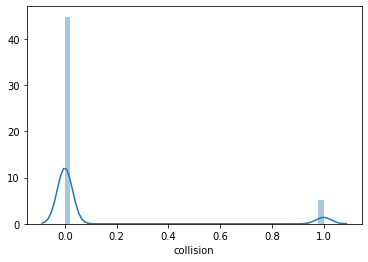

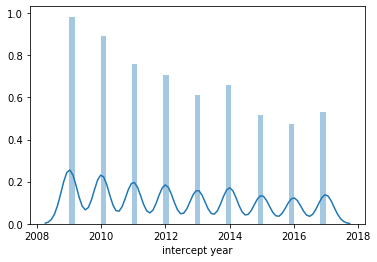

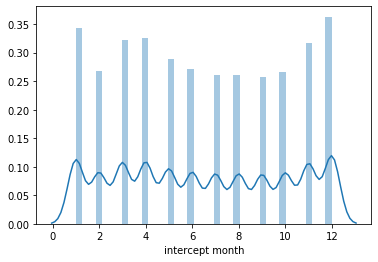

In [30]:
df=ebt_cleaned
plot_scatter = False
numerical_fields = df._get_numeric_data().columns
categorical_fields = list(set(df.columns)-set(numerical_fields))
assert len(categorical_fields)+len(numerical_fields)==len(df.columns)
for i in numerical_fields:
    for j in numerical_fields:
        if i==j:
            sns.distplot(df[i])
            plt.show()
        elif i!=j and plot_scatter:
            sns.scatterplot(x=i,y=j,data=df)
            plt.show()

In [ ]:
ebt

### Collision data v1 analysis

Reading the file

In [551]:
my_data = pd.read_csv(working_dir+'/collision_data_1.csv')
my_data.shape

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(314349, 24)

Selecting the records where  <b>alcohol was consumed<b>

In [552]:
my_data_df_1 = my_data[my_data['alcohol_involvement_flag']=='Y']
my_data_df_1.drop(['alcohol_involvement_flag'],axis=1,inplace=True)
my_data_df_1.shape

/home/nizam/.local/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(13721, 23)

In [553]:
df=my_data_df_1
del my_data_df_1
del my_data
df.shape

(13721, 23)

In [554]:
df.drop(columns=['street_number', 'street_name', 'street_type','postcode', 'lga_name','collision_injury_severity_code', 'collision_type_code', 'dca_code', 'dca_code_description', 'seat_belt_not_worn', 'helmet_not_worn','motorcyclist', 'heavy_vehicle'],axis=1,inplace=True)
print("shape after dropping unwanted columns:",aggre_df.shape)

shape after dropping unwanted columns: (14492, 11)


<b>Formatting the date and coordinates<b>

In [555]:
df['collision_date']= pd.to_datetime(df['collision_date'])  #formating date
df[['year','month','date']] = df.collision_date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
df.drop(['collision_date'],axis=1,inplace=True)
df = df[(df['speed_zone']<200)]
df.drop(df[df.latitude =='.'].index,inplace=True)
df.drop(df[df.longitude =='.'].index,inplace=True)
df['latitude']= pd.to_numeric(df['latitude'])  #formating latitude and longitude
df['longitude']= pd.to_numeric(df['longitude']) 
df['collision_time']=df['collision_time'].apply(lambda x: (x//100)+((x%100)/60))
df.shape

(12448, 12)

Filtering records yearwise

In [556]:
df_2009 = df[(df['year']=='2009')]
df_2010 = df[(df['year']=='2010')]
df_2011 = df[(df['year']=='2011')]
df_2012 = df[(df['year']=='2012')]
df_2013 = df[(df['year']=='2013')]
df_2014 = df[(df['year']=='2014')]
df_2015 = df[(df['year']=='2015')]
df_2016 = df[(df['year']=='2016')]
df_2017 = df[(df['year']=='2017')]
df_2018 = df[(df['year']=='2018')] 
print("2009",df_2009.shape)
print("2010",df_2010.shape)
print("2011",df_2011.shape)
print("2012",df_2012.shape)
print("2013",df_2013.shape)
print("2014",df_2014.shape)
print("2015",df_2015.shape)
print("2016",df_2016.shape)
print("2017",df_2017.shape)
print("2018",df_2018.shape)

2009 (2401, 12)
2010 (1981, 12)
2011 (1615, 12)
2012 (1165, 12)
2013 (981, 12)
2014 (931, 12)
2015 (832, 12)
2016 (884, 12)
2017 (872, 12)
2018 (786, 12)


### Collision columns
['tis_number', 'collision_date', 'collision_time', 'latitude',
       'longitude', 'suburb', 'country_metro', 'collision_injury_severity',
       'collision_type', 'speed_zone']

In [557]:
df.isnull().sum()/len(df)
df.to_csv(working_dir+'/collision_2009to2017_cleaned_v2.csv')

In [ ]:
# df_2009 = df[(df['collision_date']>='2009-01-01') & (df['collision_date']<='2009-12-31')]
# df_2010 = df[(df['collision_date']>='2010-01-01') & (df['collision_date']<='2010-12-31')]
# df_2011 = df[(df['collision_date']>='2011-01-01') & (df['collision_date']<='2011-12-31')]
# df_2012 = df[(df['collision_date']>='2012-01-01') & (df['collision_date']<='2012-12-31')]
# df_2013 = df[(df['collision_date']>='2013-01-01') & (df['collision_date']<='2013-12-31')]
# df_2014 = df[(df['collision_date']>='2014-01-01') & (df['collision_date']<='2014-12-31')]
# df_2015 = df[(df['collision_date']>='2015-01-01') & (df['collision_date']<='2015-12-31')]
# df_2016 = df[(df['collision_date']>='2016-01-01') & (df['collision_date']<='2016-12-31')]
# df_2017 = df[(df['collision_date']>='2017-01-01') & (df['collision_date']<='2017-12-31')]
# df_2018 = df[(df['collision_date']>='2018-01-01') & (df['collision_date']<='2018-12-31')] 
# print("2009",df_2009.shape)
# print("2010",df_2010.shape)
# print("2011",df_2011.shape)
# print("2012",df_2012.shape)
# print("2013",df_2013.shape)
# print("2014",df_2014.shape)
# print("2015",df_2015.shape)
# print("2016",df_2016.shape)
# print("2017",df_2017.shape)
# print("2018",df_2018.shape)

## dict_2009_to_2018_suburbstats for collision dataset

In [ ]:
temp=[]
for df_temp in [df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018]:
    temp.append(Counter(df_temp['suburb']))
dict_2009_to_2018_suburbstats={}
dict_2009_to_2018_suburbstats[2009] = temp[0]
dict_2009_to_2018_suburbstats[2010] = temp[1]
dict_2009_to_2018_suburbstats[2011] = temp[2]
dict_2009_to_2018_suburbstats[2012] = temp[3]
dict_2009_to_2018_suburbstats[2013] = temp[4]
dict_2009_to_2018_suburbstats[2014] = temp[5]
dict_2009_to_2018_suburbstats[2015] = temp[6]
dict_2009_to_2018_suburbstats[2016] = temp[7]
dict_2009_to_2018_suburbstats[2017] = temp[8]
dict_2009_to_2018_suburbstats[2018] = temp[9]

Sanity check

In [ ]:
assert(df.shape[0]==df_2009.shape[0]+df_2010.shape[0]+df_2011.shape[0]+df_2012.shape[0]+df_2013.shape[0]+df_2014.shape[0]+df_2015.shape[0]+df_2016.shape[0]+df_2017.shape[0]+df_2018.shape[0])

In [ ]:
for df in [df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018]:
    lat_mean = np.mean(df['latitude'])
    long_mean = np.mean(df['longitude'])
    lat_var = np.var(df['latitude'])
    long_var =np.var(df['longitude'])
    #myplot = sns.jointplot(x="latitude", y="longitude",kind='kde',data=df)
    print("latitude&longitude variance: ",lat_var+long_var,"latitude&longitude mean: ",lat_mean+long_mean)

In [ ]:
myplot

filtering out records from 2014 to 2019

In [392]:
df_2014_to_2019 = my_data_df_1[(my_data_df_1['collision_date']>'2014-01-01') & (my_data_df_1['collision_date']<'2019-01-01')]

NameError: name 'my_data_df_1' is not defined

In [ ]:
numerical_fields = df_2014_to_2019._get_numeric_data().columns
categorical_fields = list(set(df_2014_to_2019.columns)-set(numerical_fields))
assert len(categorical_fields)+len(numerical_fields)==len(df_2014_to_2019.columns)
len(numerical_fields),len(categorical_fields)

In [ ]:
df_2014_to_2019_cleaned = df_2014_to_2019[['alcohol_involvement_flag','collision_date', 'collision_time','latitude', 'longitude','lga_name', 'country_metro', 'collision_injury_severity','speed_zone']]

In [ ]:
df_2014_to_2019_cleaned.drop(df_2014_to_2019_cleaned[df_2014_to_2019_cleaned.latitude =='.'].index, inplace=True)

df_2014_to_2019_cleaned['latitude']= pd.to_numeric(df_2014_to_2019_cleaned['latitude'])  
df_2014_to_2019_cleaned['longitude']= pd.to_numeric(df_2014_to_2019_cleaned['longitude'])  


In [ ]:
df_2014_to_2019_cleaned.isnull().sum()/len(df_2014_to_2019_cleaned)

In [ ]:
df_2014_to_2019_cleaned.to_csv(working_dir+'/2014_to_2019_Y_N.csv')

In [ ]:
df_Y_N = df_2014_to_2019_cleaned

In [ ]:
lganames = list(pd.Categorical(df_Y_N['lga_name']).categories)

These lga's do not have any accidents due to alcohol in last 5 years

In [ ]:
for i in lganames:
    if "(U" in i:
        lganames.remove(i)
lganames.remove('COLAC OTWAY')
len(lganames)

In [ ]:
df=[]
for lga in lganames:
    temp_df=df_Y_N[df_Y_N['lga_name']==lga]
    df.append(temp_df)

In [ ]:
for i in range(78):
    diff=sum(df[i]['alcohol_involvement_flag']=='N')-sum(df[i]['alcohol_involvement_flag']=='Y')
    if diff==0:
        pass
    elif diff>0:
        [df[i]['alcohol_involvement_flag']=='N'

In [ ]:
import numpy as np
import numpy.random
import scipy.stats as ss
import matplotlib.pyplot as plt

# Set-up.
n = 10000
numpy.random.seed(0x5eed)
# Parameters of the mixture components
norm_params = np.array([[5, 1],
                        [1, 1.3]
                       ])
n_components = norm_params.shape[0]
print(n_components)
# Weight of each component, in this case all of them are 1/3
weights = np.ones(n_components, dtype=np.float64) / 2.0
print(weights)
# A stream of indices from which to choose the component
mixture_idx = numpy.random.choice(len(weights), size=n, replace=True, p=weights)
# y is the mixture sample
y = numpy.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)

# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(y.min(), y.max(), 200)
ys = np.zeros_like(xs)

for (l, s), w in zip(norm_params, weights):
    ys += ss.norm.pdf(xs, loc=l, scale=s) * w

plt.plot(xs, ys)
plt.hist(y, normed=True, bins="fd")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [ ]:
a=pd.Categorical(my_data['lga_name'])
b=pd.Categorical(df_2014_to_2019_cleaned['lga_name'])
improved_lga = set(b)-set(a)

In [ ]:
b

In [ ]:
improved_lgas_list=[]
for x in improved_lga:
    if my_data['lga_name']==x:
improved_lgas_list.append(my_data[my_data['lga_name']==x])

In [ ]:
# sns.pairplot(alcoholic_crashes_df)
sns.pairplot(df_2014_to_2019_cleaned, vars = list(numerical_fields), hue = 'lga_name', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)


In [ ]:
group_by_LGA_2014_to_2019 = df_2014_to_2019_cleaned.groupby(by=['lga_name','latitude','longitude'])
no_alcohol_crashes_by_LGA_2014_to_2019 =  group_by_LGA_2014_to_2019.size().sort_values(ascending=False)#77
frame=pd.DataFrame(no_alcohol_crashes_by_LGA_2014_to_2019)


In [ ]:
no_alcohol_crashes_by_LGA_2014_to_2019.to_csv('lga.csv')

## Fatal crashes in last 5 years

https://vicroadsopendata-vicroadsmaps.opendata.arcgis.com/datasets/fatal-crashes-lives-lost-last-5-years-to-date/data?orderBy=ACCIDENT_DATE&orderByAsc=false

<b>Interactive dashboard</b>
https://public.tableau.com/views/CrashstatMainlandingpage/Mainpage?:embed=y&:display_count=yes&:showTabs=y&:showVizHome=no&%3Adisplay_count=yes&%3Atoolbar=no&%3Arender=false#1

In [ ]:
df_fatal = pd.read_csv(working_dir+'/Fatal_Crashes__Lives_Lost_Last_5_Years_to_Date.csv')

In [ ]:
df_fatal.drop(['X','Y'],axis=1,inplace=True)

In [ ]:
sns.pairplot(df_fatal_2014_to_2019_age, hue = 'street_type', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)


In [ ]:
df_joined = df_2014_to_2019.set_index('tis_number').join(alcoholic_crashes_df.set_index('ACCIDENT_NO'))

In [ ]:

df_joined=df_joined[['collision_date', 'collision_time', 'latitude', 'longitude', 'lga_name',
       'country_metro', 'collision_injury_severity', 'speed_zone','DRIVER','YOUNG_DRIVER','OLD_DRIVER', 'UNLICENCSED']]

# Aggregate collision data

In [304]:
aggre_df = pd.read_csv(working_dir+'/Aggregate_data.csv')
print("data shape BEFORE filtering years:",aggre_df.shape)
#aggre_df_2014_to_2019 = aggre_df[(aggre_df['collision_year']>=2014) & (aggre_df['collision_year']<2019)]
#print("data shape AFTER filtering years:",aggre_df_2014_to_2019.shape)

data shape BEFORE filtering years: (501886, 14)


### Filtering

In [305]:
aggre_df.drop(aggre_df[aggre_df['person_bac_level_group']=='.'].index,inplace=True)
aggre_df.drop(aggre_df[aggre_df['person_bac_level_group']=='0-.02    '].index,inplace=True)
aggre_df.drop(aggre_df[(aggre_df['person gender']!='Female') & (aggre_df['person gender']!='Male')].index,inplace=True)

print("shape after filtering BAC:",aggre_df.shape)

shape after filtering BAC: (14492, 14)


Dropping unnecessary columns

In [306]:
aggre_df.drop(columns=['collision_lga_name', 'person_postcode','count_of_persons'],axis=1,inplace=True)
print("shape after dropping unwanted columns:",aggre_df.shape)

shape after dropping unwanted columns: (14492, 11)


In [307]:
aggre_2009 = aggre_df[aggre_df['collision_year']==2009]
aggre_2010 = aggre_df[aggre_df['collision_year']==2010]
aggre_2011 = aggre_df[aggre_df['collision_year']==2011]
aggre_2012 = aggre_df[aggre_df['collision_year']==2012]
aggre_2013 = aggre_df[aggre_df['collision_year']==2013]
aggre_2014 = aggre_df[aggre_df['collision_year']==2014]
aggre_2015 = aggre_df[aggre_df['collision_year']==2015]
aggre_2016 = aggre_df[aggre_df['collision_year']==2016]
aggre_2017 = aggre_df[aggre_df['collision_year']==2017]
aggre_2018 = aggre_df[aggre_df['collision_year']==2018]

In [308]:
len(aggre_2009)+len(aggre_2010)+len(aggre_2011)+len(aggre_2012)+len(aggre_2013)+len(aggre_2014)+len(aggre_2015)+len(aggre_2016)+len(aggre_2017)

13563

In [359]:
aggre = aggre_2017
aggre.isnull().sum()/len(aggre)

person_age_group          0.0
person_gender             0.0
collision_suburb          0.0
collision_year            0.0
collision_month           0.0
collision_day             0.0
collision_time_group      0.0
person_bac_level_group    0.0
person_suburb             0.0
person_licence_type       0.0
vehicle_type              0.0
dtype: float64

### Imputing values, year-wise with repective modes

In [357]:
aggre['person_gender'] = aggre['person_gender'].fillna(aggre['person_gender'].mode().iloc[0])
aggre['person_suburb'] = aggre['person_suburb'].fillna(aggre['person_suburb'].mode().iloc[0])
aggre['collision_suburb'] = aggre['collision_suburb'].fillna(aggre['collision_suburb'].mode().iloc[0])
aggre['person_licence_type'] = aggre['person_licence_type'].fillna(aggre['person_licence_type'].mode().iloc[0])
aggre['vehicle_type'] = aggre['vehicle_type'].fillna(aggre['vehicle_type'].mode().iloc[0])

/home/nizam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nizam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nizam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [367]:
# aggre_2009to2017_cleaned = pd.concat([aggre_2009,aggre_2010,aggre_2011,aggre_2012,aggre_2013,aggre_2014,aggre_2015,aggre_2016,aggre_2017])
# aggre_2009to2017_cleaned.to_csv(working_dir+'/aggre_2009to2017_cleaned.csv')

In [36]:
temp=[]
for i in [aggre_2009,aggre_2010,aggre_2011,aggre_2012,aggre_2013,aggre_2014,aggre_2015,aggre_2016,aggre_2017,aggre_2018]:
    temp.append(Counter(i['collision_suburb']))
dict_2009_to_2018_aggre_suburbstats={}
dict_2009_to_2018_aggre_suburbstats[2009] = temp[0]
dict_2009_to_2018_aggre_suburbstats[2010] = temp[1]
dict_2009_to_2018_aggre_suburbstats[2011] = temp[2]
dict_2009_to_2018_aggre_suburbstats[2012] = temp[3]
dict_2009_to_2018_aggre_suburbstats[2013] = temp[4]
dict_2009_to_2018_aggre_suburbstats[2014] = temp[5]
dict_2009_to_2018_aggre_suburbstats[2015] = temp[6]
dict_2009_to_2018_aggre_suburbstats[2016] = temp[7]
dict_2009_to_2018_aggre_suburbstats[2017] = temp[8]
dict_2009_to_2018_aggre_suburbstats[2018] = temp[9]

## EBT

In [640]:
ebt_df = pd.read_csv(working_dir+'/EBT_Aggregate_data.csv')
print("original data shape",ebt_df.shape)
#ebt_df_2014_to_2019 = ebt_df[(ebt_df['intercept year']>=2014) & (ebt_df['intercept year']<2019)]
#print("data shape AFTER filtering years:",ebt_df_2014_to_2019.shape)

original data shape (152048, 32)


#### Filtering EBT data
Including only those instances with BAC>=0.02(indication of alcohol in the human system) as per client's advice

In [645]:
ebt_df.to_csv(working_dir+'/ebt_2009to2017_cleaned_v3.csv')

In [644]:
# ebt_df.drop(ebt_df[ebt_df['person bac level group']=='.'].index,inplace=True)
# ebt_df.drop(ebt_df[ebt_df['person bac level group']=='0-.02    '].index,inplace=True)

ebt_df.drop(ebt_df[ebt_df['person age group']=='Unknown'].index,inplace=True)
ebt_df.drop(ebt_df[ebt_df['person age group']=='-1'].index,inplace=True)

ebt_df.drop(ebt_df[(ebt_df['person gender']!='M') & (ebt_df['person gender']!='F')].index,inplace=True)
print("shape after filtering BAC:",ebt_df.shape)

shape after filtering BAC: (117039, 14)


### Transforming time

In [588]:
ebt_2009to2017_cleaned = pd.read_csv(working_dir+'/ebt_2009to2017_cleaned.csv')
def transform_time(x):
    try:
        if ":" in x:
            temp = x.split(":")
            time = int(temp[0]+temp[1])
            hrs = time//100
            mins = (time%100)
            return hrs+(mins/60)
    except:
        pass
    
ebt_2009to2017_cleaned['Intercept Time']=ebt_2009to2017_cleaned['Intercept Time'].apply(lambda x: transform_time(x))
ebt_2009to2017_cleaned.to_csv(working_dir+'/ebt_2009to2017_cleaned_v2.csv')

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dropping unnecessary columns

In [578]:
ebt_df.drop(columns=['full beer', 'light beer', 'wine', 'spirits', 'cider', 'fortified wine',
       'other alcohol', 'alcohol type unknown','person bac level group','intercept postcode','person address post code','no of persons','place of last drink','licenced premises suburb','licenced premises postcode','intercept lga', 'LGA Description','offence type'],axis=1,inplace=True)
print("shape after dropping unwanted columns:",ebt_df.shape)

shape after dropping unwanted columns: (136479, 14)


Segregating data, year-wise

In [579]:
ebt_df_2008 = ebt_df[ebt_df['intercept year']==2008]
ebt_df_2009 = ebt_df[ebt_df['intercept year']==2009]
ebt_df_2010 = ebt_df[ebt_df['intercept year']==2010]
ebt_df_2011 = ebt_df[ebt_df['intercept year']==2011]
ebt_df_2012 = ebt_df[ebt_df['intercept year']==2012]
ebt_df_2013 = ebt_df[ebt_df['intercept year']==2013]
ebt_df_2014 = ebt_df[ebt_df['intercept year']==2014]
ebt_df_2015 = ebt_df[ebt_df['intercept year']==2015]
ebt_df_2016 = ebt_df[ebt_df['intercept year']==2016]
ebt_df_2017 = ebt_df[ebt_df['intercept year']==2017]

In [580]:
print("no of tests from 2009 to 2017 after collisions: ",sum(ebt_df_2009.collision==1)+sum(ebt_df_2010.collision==1)+sum(ebt_df_2011.collision==1)+sum(ebt_df_2012.collision==1)+sum(ebt_df_2013.collision==1)+sum(ebt_df_2014.collision==1)+sum(ebt_df_2015.collision==1)+sum(ebt_df_2016.collision==1)+sum(ebt_df_2017.collision==1))

no of tests from 2009 to 2017 after collisions:  11952


In [581]:
### EBT columns
ebt_df.columns

Index(['person age group', 'person gender', 'intercept type', 'collision',
       'intercept suburb', 'intercept year', 'intercept month',
       'intercept day', 'Intercept Time', 'distance prior to intercept',
       'person occupation', 'person address suburb', 'licence type',
       'vehicle type'],
      dtype='object')

### Imputing EBT dataset,year-wise with the modes

In [ ]:
ebt = ebt_df_2009#change the year

In [284]:
ebt['person gender'] = ebt['person gender'].fillna(ebt['person gender'].mode().iloc[0])
ebt['person address suburb'] = ebt['person address suburb'].fillna(ebt['person address suburb'].mode().iloc[0])
ebt['intercept suburb'] = ebt['intercept suburb'].fillna(ebt['intercept suburb'].mode().iloc[0])
ebt['person occupation'] = ebt['person occupation'].fillna(ebt['person occupation'].mode().iloc[0])
ebt['licence type'] = ebt['licence type'].fillna(ebt['licence type'].mode().iloc[0])
ebt['vehicle type'] = ebt['vehicle type'].fillna(ebt['vehicle type'].mode().iloc[0])
ebt.isnull().sum()/len(ebt)

/home/nizam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nizam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nizam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [293]:
#concatenated all ebt data after preprocessing
#ebt_2009to2017_cleaned = pd.concat([ebt_df_2009,ebt_df_2010,ebt_df_2011,ebt_df_2012,ebt_df_2013,ebt_df_2014,ebt_df_2015,ebt_df_2016,ebt_df_2017])

In [295]:
ebt_df_2009.shape

(18787, 14)

### no of intercept - no of collisions

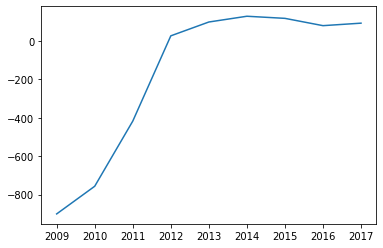

In [300]:
diff = []
years = [2009,2010,2011,2012,2013,2014,2015,2016,2017]
diff.append(sum(ebt_df_2009.collision==1)-len(aggre_2009))
diff.append(sum(ebt_df_2010.collision==1)-len(aggre_2010))
diff.append(sum(ebt_df_2011.collision==1)-len(aggre_2011))
diff.append(sum(ebt_df_2012.collision==1)-len(aggre_2012))
diff.append(sum(ebt_df_2013.collision==1)-len(aggre_2013))
diff.append(sum(ebt_df_2014.collision==1)-len(aggre_2014))
diff.append(sum(ebt_df_2015.collision==1)-len(aggre_2015))
diff.append(sum(ebt_df_2016.collision==1)-len(aggre_2016))
diff.append(sum(ebt_df_2017.collision==1)-len(aggre_2017))
sns.lineplot(x=years,y=diff)

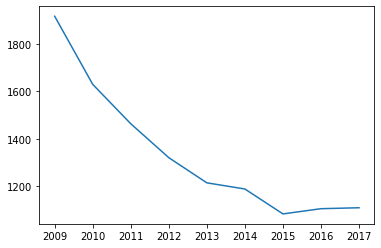

In [301]:
ebt_collisions = []
years = [2009,2010,2011,2012,2013,2014,2015,2016,2017]
ebt_collisions.append(sum(ebt_df_2009.collision==1))
ebt_collisions.append(sum(ebt_df_2010.collision==1))
ebt_collisions.append(sum(ebt_df_2011.collision==1))
ebt_collisions.append(sum(ebt_df_2012.collision==1))
ebt_collisions.append(sum(ebt_df_2013.collision==1))
ebt_collisions.append(sum(ebt_df_2014.collision==1))
ebt_collisions.append(sum(ebt_df_2015.collision==1))
ebt_collisions.append(sum(ebt_df_2016.collision==1))
ebt_collisions.append(sum(ebt_df_2017.collision==1))
sns.lineplot(x=years,y=ebt_collisions)

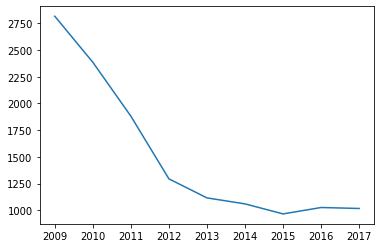

In [75]:
aggre_collisions = []
years = [2009,2010,2011,2012,2013,2014,2015,2016,2017]
aggre_collisions.append(len(aggre_2009))
aggre_collisions.append(len(aggre_2010))
aggre_collisions.append(len(aggre_2011))
aggre_collisions.append(len(aggre_2012))
aggre_collisions.append(len(aggre_2013))
aggre_collisions.append(len(aggre_2014))
aggre_collisions.append(len(aggre_2015))
aggre_collisions.append(len(aggre_2016))
aggre_collisions.append(len(aggre_2017))
sns.lineplot(x=years,y=aggre_collisions)

The legal blood alcohol limits in Victoria are -

Over the age of 21 - 0.05

Under the age of 21 - 0.00  
<b>PCA:Prescribed Content of Alcohol  
Driving under the influence (DUI)  
driving while impaired/driving while intoxicated (DWI)  
Z condition:zero alcohol levels i.e. under 21 drivers</b>

### General plotting function

In [ ]:
plot_scatter = False
numerical_fields =df._get_numeric_data().columns
print(numerical_fields)
categorical_fields = list(set(df.columns)-set(numerical_fields))
assert len(categorical_fields)+len(numerical_fields)==len(df.columns)
for i in numerical_fields:
    for j in numerical_fields:
        if i==j:
            sns.distplot(df[i])
            plt.show()
        elif i!=j and plot_scatter:
            sns.scatterplot(x=i,y=j,data=df)
            plt.show()

## collision data

In [589]:
ebt_2009to2017_cleaned[ebt_2009to2017_cleaned.collision==1].shape,df.shape,aggre_2009to2017_cleaned.shape

((12027, 17), (12448, 12), (13563, 12))

In [637]:
ebt_2009to2017_cleaned=pd.read_csv(working_dir+'/ebt_2009to2017_cleaned.csv')

In [638]:
ebt_2009to2017_cleaned.isnull().sum()/len(ebt_2009to2017_cleaned)

person age group               0.0
person gender                  0.0
intercept type                 0.0
collision                      0.0
intercept suburb               0.0
intercept year                 0.0
intercept month                0.0
intercept day                  0.0
Intercept Time                 0.0
distance prior to intercept    0.0
person occupation              0.0
person address suburb          0.0
licence type                   0.0
vehicle type                   0.0
dtype: float64

In [639]:
Counter(ebt_2009to2017_cleaned['person gender'])

Counter({'F': 23128, 'M': 93913, 'U': 2, 'f': 1, 'm': 19})

In [ ]:
plot_scatter = False
numerical_fields = df._get_numeric_data().columns
print(numerical_fields)
categorical_fields = list(set(df.columns)-set(numerical_fields))
assert len(categorical_fields)+len(numerical_fields)==len(df.columns)
for i in numerical_fields:
    for j in numerical_fields:
        if i==j:
            sns.distplot(df[i])
            plt.show()
        elif i!=j and plot_scatter:
            sns.scatterplot(x=i,y=j,data=df)
            plt.show()

### EBT analysis

In [137]:
ebt_cleaned = pd.read_csv(working_dir+'/ebt_2009to2017_cleaned.csv')
ebt_cleaned.shape

(117039, 14)

In [138]:
ebt_cleaned.loc[(0.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<1.0), 'categorical_intercept_time'] = '1'
ebt_cleaned.loc[(1.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<2.0), 'categorical_intercept_time'] = '2' 
ebt_cleaned.loc[(2.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<3.0), 'categorical_intercept_time'] = '3' 
ebt_cleaned.loc[(3.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<4.0), 'categorical_intercept_time'] = '4' 
ebt_cleaned.loc[(4.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<5.0), 'categorical_intercept_time'] = '5' 
ebt_cleaned.loc[(5.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<6.0), 'categorical_intercept_time'] = '6' 
ebt_cleaned.loc[(6.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<7.0), 'categorical_intercept_time'] = '7' 
ebt_cleaned.loc[(7.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<8.0), 'categorical_intercept_time'] = '8' 
ebt_cleaned.loc[(8.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<9.0), 'categorical_intercept_time'] = '9' 
ebt_cleaned.loc[(9.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<10.0), 'categorical_intercept_time'] = '10' 
ebt_cleaned.loc[(10.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<11.0), 'categorical_intercept_time'] = '11' 
ebt_cleaned.loc[(11.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<12.0), 'categorical_intercept_time'] = '12' 
ebt_cleaned.loc[(12.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<13.0), 'categorical_intercept_time'] = '13' 
ebt_cleaned.loc[(13.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<14.0), 'categorical_intercept_time'] = '14' 
ebt_cleaned.loc[(14.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<15.0), 'categorical_intercept_time'] = '15' 
ebt_cleaned.loc[(15.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<16.0), 'categorical_intercept_time'] = '16' 
ebt_cleaned.loc[(16.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<17.0), 'categorical_intercept_time'] = '17' 
ebt_cleaned.loc[(17.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<18.0), 'categorical_intercept_time'] = '18' 
ebt_cleaned.loc[(18.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<19.0), 'categorical_intercept_time'] = '19' 
ebt_cleaned.loc[(19.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<20.0), 'categorical_intercept_time'] = '20' 
ebt_cleaned.loc[(20.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<21.0), 'categorical_intercept_time'] = '21' 
ebt_cleaned.loc[(21.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<22.0), 'categorical_intercept_time'] = '22' 
ebt_cleaned.loc[(22.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<23.0), 'categorical_intercept_time'] = '23' 
ebt_cleaned.loc[(23.0<=ebt_cleaned['Intercept Time'])&(ebt_cleaned['Intercept Time']<24.0), 'categorical_intercept_time'] = '24' 

In [139]:
y = ebt_cleaned['categorical_intercept_time']#response
y = pd.get_dummies(data=y)#dropfirst=TRue
X = ebt_cleaned[['person age group', 'person gender', 'intercept type', 'collision',
        'intercept year', 'intercept month',
       'intercept day', 'distance prior to intercept',
       'person occupation']]
X = pd.get_dummies(data=X)
y.shape,X.shape

((117039, 24), (117039, 52))

In [147]:
df=pd.read_csv(working_dir+'/ebt_2009to2017_cleaned.csv')
df_2009 = df[(df['intercept year']==2009)]
df_2010 = df[(df['intercept year']==2010)]
df_2011 = df[(df['intercept year']==2011)]
df_2012 = df[(df['intercept year']==2012)]
df_2013 = df[(df['intercept year']==2013)]
df_2014 = df[(df['intercept year']==2014)]
df_2015 = df[(df['intercept year']==2015)]
df_2016 = df[(df['intercept year']==2016)]
df_2017 = df[(df['intercept year']==2017)]
df.columns

Index(['person age group', 'person gender', 'intercept type', 'collision',
       'intercept suburb', 'intercept year', 'intercept month',
       'intercept day', 'Intercept Time', 'distance prior to intercept',
       'person occupation', 'person address suburb', 'licence type',
       'vehicle type'],
      dtype='object')

In [186]:
len(Counter(df_2009['intercept suburb'])),len(Counter(df_2010['intercept suburb'])),len(Counter(df_2011['intercept suburb'])),len(Counter(df_2012['intercept suburb'])),len(Counter(df_2013['intercept suburb'])),len(Counter(df_2014['intercept suburb'])),len(Counter(df_2015['intercept suburb'])),len(Counter(df_2016['intercept suburb'])),len(Counter(df_2017['intercept suburb']))

(1139, 1078, 1095, 1088, 1080, 1116, 1012, 991, 1043)

In [226]:
suburb_year = {}
for index, row in df.iterrows():
    if row['intercept suburb'] not in suburb_year.keys():
        year_wise = {}#for every new suburb create an empty dictionary
        records_list = []
        records_list.append(row)
        year_wise[row['intercept year']] = records_list
        suburb_year[row['intercept suburb']]=year_wise
    else:
        year_wise = suburb_year[row['intercept suburb']]#retreiving the suburb's year_wise dictionary
        if row['intercept year'] not in year_wise.keys():#year_wise dictionary already exists but the key is not yet observed
            records_list = []#the only line differeing from below else block
            records_list.append(row)
            year_wise[row['intercept year']] = records_list
        else:#the year has already been added in the first if block
            records_list = year_wise[row['intercept year']]#the only line differeing from immediate above if block
            records_list.append(row)
            year_wise[row['intercept year']] = records_list
        suburb_year[row['intercept suburb']] = year_wise

In [241]:
suburb_year[]

KeyboardInterrupt: 

In [215]:
dummy3=[]
dummy2=[]
dummy1=[]

for suburb in suburb_year.keys():
    if len(suburb_year[suburb])<10:
        dummy1.append((suburb,len(suburb_year[suburb])))
    elif(len(suburb_year[suburb])>=10 and len(suburb_year[suburb])<=99):
        dummy2.append((suburb,len(suburb_year[suburb])))
    else:
        dummy3.append((suburb,len(suburb_year[suburb])))
len(dummy1),len(dummy2),len(dummy3),len(dummy1)+len(dummy2)+len(dummy3)==len(suburb_year)

(1196, 543, 287, True)

In [245]:
suburb_year['Braybrook'][2009]

[person age group                       0-16
 person gender                             M
 intercept type                      Non-RBT
 collision                                 0
 intercept suburb                  Braybrook
 intercept year                         2009
 intercept month                           5
 intercept day                           Sat
 Intercept Time                           21
 distance prior to intercept         <5km   
 person occupation                   STUDENT
 person address suburb          Keilor Downs
 licence type                     Unlicensed
 vehicle type                            Car
 Name: 0, dtype: object, person age group                    16-17
 person gender                           M
 intercept type                    Non-RBT
 collision                               0
 intercept suburb                Braybrook
 intercept year                       2009
 intercept month                         5
 intercept day                         Tue
 I

In [145]:
# from sklearn import linear_model
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .20, random_state = 40)
# regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
# regr.fit(X_train, Y_train)
# predicted = regr.predict(X_test)

In [146]:
# multi-class classification with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .20, random_state = 40)
model = Sequential()
model.add(Dense(8, input_dim=X.shape[1], activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs = 10, batch_size = 2)
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/10
93631/93631 [==============================] - 81s 870us/step - loss: 14.8931 - acc: 0.0760
Epoch 2/10
93631/93631 [==============================] - 82s 871us/step - loss: 14.8931 - acc: 0.0760
Epoch 3/10
93631/93631 [==============================] - 88s 937us/step - loss: 14.8931 - acc: 0.0760
Epoch 4/10
93631/93631 [==============================] - 82s 878us/step - loss: 14.8931 - acc: 0.0760
Epoch 5/10
93631/93631 [==============================] - 82s 875us/step - loss: 14.8931 - acc: 0.0760
Epoch 6/10
93631/93631 [==============================] - 82s 874us/step - loss: 14.8931 - acc: 0.0760
Epoch 7/10
93631/93631 [==============================] - 83s 885us/step - loss: 14.8931 - acc: 0.0760
Epoch 8/10
93631/93631 [==============================] - 82s 879us/step - loss: 14.8931 - acc: 0.0760
Epoch 9/10
93631/93631 [==============================] - 83s 884us/step - loss: 14.8931 - acc: 0.0760
Epoch 10/10
23408/23408 [==============================] - 1s 36us/step



In [106]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

ValueError: Found input variables with inconsistent numbers of samples: [150, 18777]